In [1]:
import numpy as np

In [18]:
class LDA_basic():
    def __init__(self, X, y, n_components):
        
        self.X = X
        self.y = y
        #nummber of dimensions to mantain
        self.n_components = n_components
        self.labels = np.unique(self.y)
        self.n_samples, self.n_features = self.X.shape
        
    #compute the between classes distance matrix
    def compute_B_S(self):
        
        self.B = np.zeros((self.n_features, self.n_features))
        self.S = np.zeros((self.n_features, self.n_features))
        #mean of all observations (all rows)
        mean = np.mean(self.X, axis = 0)
        
        for c in self.labels:
            X_c = X[y == c]
            n = X_c.shape[0]
            mean_c = np.mean(X_c, axis = 0)
            
            difference = (mean_c - mean).reshape(self.n_features, 1)
            self.B += n * np.dot(difference, difference.T)
            
            for x in X_c:
                difference = (x - mean_c).reshape(self.n_features, 1)
                self.S += np.dot(difference, difference.T)
                
    
    def get_eigen_vects(self):
        
        S_inv = np.linalg.inv(self.S)
        SB = np.dot(S_inv, self.B)
        
        eigen_values, eigen_vectors = np.linalg.eig(SB)
        
        return eigen_values, eigen_vectors
    
    def get_discriminants(self):
        
        e_values, e_vectors = self.get_eigen_vects()
        
        indexes = np.argsort(abs(e_values))[::-1]
        
        e_vectors = e_vectors.T
        self.linear_discriminants = e_vectors[indexes[0: self.n_components]]
        
    
    
    def fit(self):
        self.compute_B_S()
        self.get_discriminants()
    
    def project(self):
        
        self.projections = np.dot(self.X, self.linear_discriminants.T)
        
        return self.projections

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


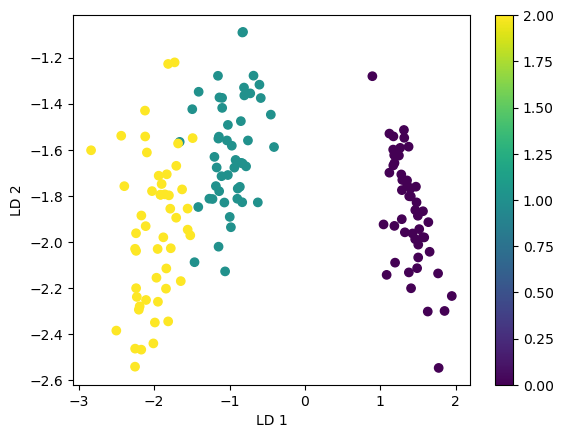

In [19]:
#Test the code
data = datasets.load_iris()
X, y = data.data, data.target

# Project the data onto the 2 primary linear discriminants
lda = LDA_basic(X, y, 2)
lda.fit()
X_projected = lda.project()

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.scatter(
    x1, x2, c=y
)

plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.colorbar()
plt.show()